## **Code pstricks & matplotlib et Splines cubiques**

La fonction comprend 5 éléments, donnés sous forme de listes :
* celle de l'axe des x : min, max, pasprincipal, passecondaire ;
* celle de l'axe des y : min, max, pasprincipal, passecondaire ;
* la liste des abcsisses des points de la courbe ;
* la liste des ordonnées des points de la courbe ;
* la liste des pentes des tangentes aux points de la courbe.

Les commandes suivantes sont utilisées dans le code pstricks (la grille doit être paramétrée pour "coller" aux bords !).

In [ ]:
#packages numpy et matplotlib au cas où !
!pip install numpy
!pip install matplotlib

In [1]:
#générateur code pstricks

import numpy as np

#code pour les splines
def splinepstricks(xa,ya,ypa,xb,yb,ypb):
    A = np.array([[xa**3,xa**2,xa,1],[3*xa**2,2*xa,1,0],[xb**3,xb**2,xb,1],[3*xb**2,2*xb,1,0]])
    B = np.array([ya,ypa,yb,ypb])
    sol = np.linalg.solve(A,B)
    print(f"{round(sol[0],4)}*x^3+{round(sol[1],4)}*x^2+{round(sol[2],4)}*x+{round(sol[3],4)}"+"}")

#code pour les lignes de la grille
def defgrillepstricks(X,Y):
    xa, xb = X[0], X[1]
    ya, yb = Y[0], Y[1]
    pasx, passx = X[2], X[3]
    pasy, passy = Y[2], Y[3]
    chaine = "\\defgrille{"+str(xa)+"}{"+str(xb)+"}{"+str(pasx)+"}{"+str(passx)+"}{"+str(ya)+"}{"+str(yb)+"}{"+str(pasy)+"}{"+str(passy)+"}"
    print(chaine)

#code pour l'environnement pspicture
def begpspicture(X,Y):
    deb = "\\begin{pspicture}("+str(X[0])+","+str(Y[0])+")("+str(X[1])+","+str(Y[1])+")"
    print(deb)
    grilles = "    \\grilles{linewidth=0.3pt,linecolor=orange!50}"
    grillep = "    \\grillep{linewidth=0.6pt,linecolor=orange!50}"
    print(grilles)
    print(grillep)

#code pour les axes
def axespstricks(X,Y):
    axe = "    \\psaxes[linewidth=1pt,Dx="+str(X[2])+",Dy="+str(Y[2])+"]{->}(0,0)("+str(X[0])+","+str(Y[0])+")("+str(X[1])+","+str(Y[1])+")"
    print(axe)

#code pour l'environnement complet
def codepstricks(X,Y,listeX,listeY,listeDer):
    psset = "\\psset{xunit=1cm,yunit=1cm,algebraic=true,tickwidth=1pt}"
    print(psset)
    defgrillepstricks(X,Y)
    begpspicture(X[0:2],Y[0:2])
    axespstricks(X[0:3],Y[0:3])
    nb_points = len(listeX)
    for i in range(nb_points-1):
        fonction = "    \\psplot[linewidth=1.25pt,linecolor=red,plotpoints=200]{"+str(listeX[i])+"}{"+str(listeX[i+1])+"}{"
        print(fonction,end='')
        splinepstricks(listeX[i],listeY[i],listeDer[i],listeX[i+1],listeY[i+1],listeDer[i+1])
    fin = "\\end{pspicture}"
    print(fin)

On travaille dans le repère délimité par les points (-5,-3) et (8,4).
Les graduations sont 1 en principal et 1 en secondaire pour les x et les y.
La courbe doit passer par :
* le point (-4,-1) avec une demie-tangente horizontale ;
* le point (-2,-2) avec une tangente horizontale ;
* le point (2,2) avec une tangente horizontale ;
* le point (4,1) avec une tangente horizontale ;
* le point (7,3) avec une tangente de pente 1.5.

Voilà le résultat après compilation d'un fichier tex.

![title](./img/splines.png)

In [2]:
codepstricks([-5,8,1,1],[-3,4,1,1],[-4,-2,2,4,7],[-1,-2,2,1,3],[0,0,0,0,1.5])

\psset{xunit=1cm,yunit=1cm,algebraic=true,tickwidth=1pt}
\defgrille{-5}{8}{1}{1}{-3}{4}{1}{1}
\begin{pspicture}(-5,-3)(8,4)
    \grilles{linewidth=0.3pt,linecolor=orange!50}
    \grillep{linewidth=0.6pt,linecolor=orange!50}
    \psaxes[linewidth=1pt,Dx=1,Dy=1]{->}(0,0)(-5,-3)(8,4)
    \psplot[linewidth=1.25pt,linecolor=red,plotpoints=200]{-4}{-2}{0.25*x^3+2.25*x^2+6.0*x+3.0}
    \psplot[linewidth=1.25pt,linecolor=red,plotpoints=200]{-2}{2}{-0.125*x^3+0.0*x^2+1.5*x+0.0}
    \psplot[linewidth=1.25pt,linecolor=red,plotpoints=200]{2}{4}{0.25*x^3+-2.25*x^2+6.0*x+-3.0}
    \psplot[linewidth=1.25pt,linecolor=red,plotpoints=200]{4}{7}{0.0185*x^3+-0.0556*x^2+-0.4444*x+2.4815}
\end{pspicture}


**Remarque**<br>
Le code est facilement modifiable (couleurs, rajouts, etc) !<br>
Les lignes relatives à la grille peuvent être enlevées et/ou modifiées.<br>
Chaque portion de courbe peut également être modifiée !

In [7]:
# avec matplotlib

import matplotlib.pyplot as plt
import numpy as np

def splineplotlib(xa,ya,ypa,xb,yb,ypb):
    A = np.array([[xa**3,xa**2,xa,1],[3*xa**2,2*xa,1,0],[xb**3,xb**2,xb,1],[3*xb**2,2*xb,1,0]])
    B = np.array([ya,ypa,yb,ypb])
    sol = np.linalg.solve(A,B)
    return sol

def courbespline(X,Y,listeX,listeY,listeDer):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    # les axes
    plt.axis([X[0], X[1], Y[0], Y[1]])
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(X[0], X[1], X[2]))
    ax.set_yticks(np.arange(Y[0], Y[1], Y[2]))
    
    #code
    nb_points = len(listeX)
    for i in range(nb_points-1):
        x = np.linspace(listeX[i],listeX[i+1],100)
        coeff = splineplotlib(listeX[i],listeY[i],listeDer[i],listeX[i+1],listeY[i+1],listeDer[i+1])
        plt.plot(x,coeff[0]*x**3+coeff[1]*x**2+coeff[2]*x+coeff[3])
    
    #affichage
    plt.grid()
    return plt.show()

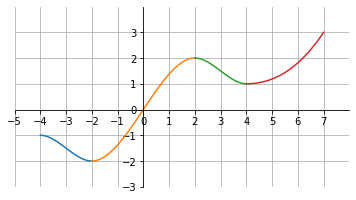

In [8]:
courbespline([-5,8,1,1],[-3,4,1,1],[-4,-2,2,4,7],[-1,-2,2,1,3],[0,0,0,0,1.5])

In [13]:
#codes splines TiKZ

import numpy as np

#code pour les splines en version gnuplot
def splinegnuplot(xa,ya,ypa,xb,yb,ypb):
    A = np.array([[xa**3,xa**2,xa,1],[3*xa**2,2*xa,1,0],[xb**3,xb**2,xb,1],[3*xb**2,2*xb,1,0]])
    B = np.array([ya,ypa,yb,ypb])
    sol = np.linalg.solve(A,B)
    print(f"{round(sol[0],4)}*x**3+{round(sol[1],4)}*x**2+{round(sol[2],4)}*x+{round(sol[3],4)}"+"} ;")

#code pour les splines en version pgf
def splinepgf(xa,ya,ypa,xb,yb,ypb):
    A = np.array([[xa**3,xa**2,xa,1],[3*xa**2,2*xa,1,0],[xb**3,xb**2,xb,1],[3*xb**2,2*xb,1,0]])
    B = np.array([ya,ypa,yb,ypb])
    sol = np.linalg.solve(A,B)
    print(f"{round(sol[0],4)}*\\x*\\x*\\x+{round(sol[1],4)}*\\x*\\x+{round(sol[2],4)}*\\x+{round(sol[3],4)}"+"}) ;")
    
#code pour les lignes de la grille
def defgrilletikz(X,Y,units):
    xa, xb = X[0], X[1]
    ya, yb = Y[0], Y[1]
    pasx, passx = X[2], X[3]
    pasy, passy = Y[2], Y[3]
    tunits = "\\tunits{" + str(units[0]) + "}{" + str(units[1]) + "}"
    print(tunits)
    chaine = "\\tdefgrille{"+str(xa)+"}{"+str(xb)+"}{"+str(pasx)+"}{"+str(passx)+"}{"+str(ya)+"}{"+str(yb)+"}{"+str(pasy)+"}{"+str(passy)+"}"
    print(chaine)
    print(r"\begin{tikzpicture}[x=\xunit cm,y=\yunit cm]")

#code pour l'environnement pspicture
def begtikz(X,Y):
    #deb = "\\begin{pspicture}("+str(X[0])+","+str(Y[0])+")("+str(X[1])+","+str(Y[1])+")"
    #print(deb)
    print(f"    %grilles & axes")
    grilles = r"    \tgrilles[line width=0.3pt,lightgray!50] ;"
    grillep = r"    \tgrillep[line width=0.6pt,lightgray!50] ;"
    print(grilles)
    print(grillep)

#code pour les axes
def axestikz(X,Y):
    print(r"    \axestikz* ;")
    axex = "    \\axextikz[]{" + str(X[0]) + "," + str(X[0]+X[2]) + ",...," + str(X[1]-X[2]) + "} ;"
    axey = "    \\axeytikz[]{" + str(Y[0]) + "," + str(Y[0]+Y[2]) + ",...," + str(Y[1]-Y[2]) + "} ;"
    print(axex)
    print(axey)

#code pour l'environnement complet
def codetikz(X,Y,listeX,listeY,listeDer,units):
    defgrilletikz(X,Y,units)
    begtikz(X[0:2],Y[0:2])
    axestikz(X[0:3],Y[0:3])
    print(r"    clip (\xmin,\ymin rectangle (\xmax,\ymax) ; %on restreint les fonctions à la fenêtre")
    nb_points = len(listeX)
    print(r"    %les splines en gnuplot")
    for i in range(nb_points-1):
        fonction = "    \\draw[line width=1.25pt,red,samples=200,domain=" +str(listeX[i])+":"+str(listeX[i+1])+"] plot function{"
        print(fonction,end='')
        splinegnuplot(listeX[i],listeY[i],listeDer[i],listeX[i+1],listeY[i+1],listeDer[i+1])
    print(r"    %les splines en pgf")
    for i in range(nb_points-1):
        fonction = "    \\draw[line width=1.25pt,red,samples=200,domain=" +str(listeX[i])+":"+str(listeX[i+1])+"] plot(\\x,{"
        print(fonction,end='')
        splinepgf(listeX[i],listeY[i],listeDer[i],listeX[i+1],listeY[i+1],listeDer[i+1])
    fin = "\\end{tikzpicture}"
    print(fin)


In [14]:
codetikz([-5,8,1,1],[-3,4,1,1],[-4,-2,2,4,7],[-1,-2,2,1,3],[0,0,0,0,1.5],[1,1])

\tunits{1}{1}
\tdefgrille{-5}{8}{1}{1}{-3}{4}{1}{1}
\begin{tikzpicture}[x=\xunit cm,y=\yunit cm]
    %grilles & axes
    \tgrilles[line width=0.3pt,lightgray!50] ;
    \tgrillep[line width=0.6pt,lightgray!50] ;
    \axestikz* ;
    \axextikz[]{-5,-4,...,7} ;
    \axeytikz[]{-3,-2,...,3} ;
    clip (\xmin,\ymin rectangle (\xmax,\ymax) ; %on restreint les fonctions à la fenêtre
    %les splines en gnuplot
    \draw[line width=1.25pt,red,samples=200,domain=-4:-2] plot function{0.25*x**3+2.25*x**2+6.0*x+3.0} ;
    \draw[line width=1.25pt,red,samples=200,domain=-2:2] plot function{-0.125*x**3+0.0*x**2+1.5*x+0.0} ;
    \draw[line width=1.25pt,red,samples=200,domain=2:4] plot function{0.25*x**3+-2.25*x**2+6.0*x+-3.0} ;
    \draw[line width=1.25pt,red,samples=200,domain=4:7] plot function{0.0185*x**3+-0.0556*x**2+-0.4444*x+2.4815} ;
    %les splines en pgf
    \draw[line width=1.25pt,red,samples=200,domain=-4:-2] plot(\x,{0.25*\x*\x*\x+2.25*\x*\x+6.0*\x+3.0}) ;
    \draw[line width=1.25pt,red,